# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 4 :  Data Cleaning and Management

## Reading: 

- PDSH Chapter 5 Machine Learning
- PDSH Indroducing Scikit-Learn
- PDSH In Depth: Naive Bayes Classification
- PDSH In Depth: Linear Regression

## Data Science Lists

- Data Elixir (https://dataelixir.com/)
- Data Science Roundup (http://roundup.fishtownanalytics.com/)
- KDNuggets (http://www.kdnuggets.com/news/subscribe.html)
- Data Science Central (http://www.datasciencecentral.com/profiles/blogs/check-out-our-dsc-newsletter)

## Today

- Data Cleaning (& Manipulation)
    - Duplicates
    - Outliers
    - Differing Scales
    - Binning
    

- Data Management
    - Strucured vs. Unstructured
    - Relational vs. NoSQL

## Data Cleaning (& Manipulation)

## Dealing with Duplicates

<pre>
Signature: df.drop_duplicates(subset=None, keep='first', inplace=False)
Docstring:
Return DataFrame with duplicate rows removed, optionally only
considering certain columns

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns
keep : {'first', 'last', False}, default 'first'
    - ``first`` : Drop duplicates except for the first occurrence.
    - ``last`` : Drop duplicates except for the last occurrence.
    - False : Drop all duplicates.
inplace : boolean, default False
    Whether to drop duplicates in place or to return a copy
</pre>

## Dealing with Outliers

"An observation different from other observations."

### Causes of outliers

- human data entry error

- instrument measurement errors

- data processing errors

- sampling errors

- natural deviations

### Why worry about them?

- May indicate issue with the data

- Can throw off analysis

<img src='http://www.kdnuggets.com/wp-content/uploads/outlier-detection-1.png'>

<img src='https://cdn-images-1.medium.com/max/800/0*oj1v0rhvPt0u-jYH.'>

<img src='https://cdn-images-1.medium.com/max/1000/0*A1Wupu3hKsJMvUdH.'>

<img src='https://upload.wikimedia.org/wikipedia/commons/6/63/Contextual_Outlier.png?1506472654865'>

<img src='https://upload.wikimedia.org/wikipedia/commons/0/07/Two-dimensional_Outliers_Example.png?1506472760120'>

### Detecting outliers

#### Simply understanding the data

#### Visualization: gaps, boxplots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(123)

df = pd.DataFrame(np.random.normal(50,20,1000), columns=['measure'])
df = df.append(pd.DataFrame(np.random.normal(120,1,20), columns=['measure']))

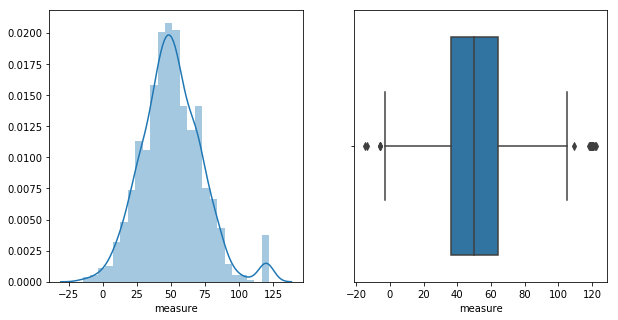

In [2]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
_ = sns.distplot(df.measure,ax=ax[0])
_ = sns.boxplot(df.measure,ax=ax[1])

#### z-score

<img src='https://cdn-images-1.medium.com/max/800/0*y7kVHEQPQKBg3Cga.'>

In [3]:
df['measure_zscore'] = (df.measure - df.measure.mean()) / df.measure.std()

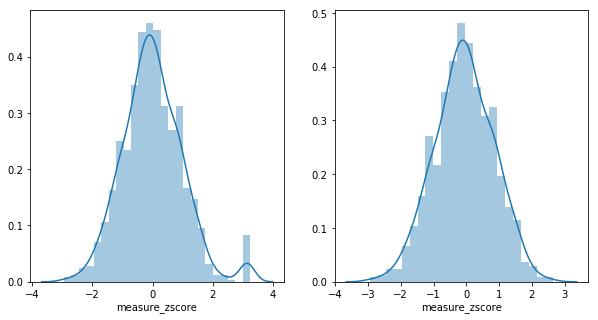

In [4]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
_ = sns.distplot(df.measure_zscore, ax=ax[0])

keep_idx = np.abs(df.measure_zscore) < 3
_ = sns.distplot(df[keep_idx].measure_zscore, ax=ax[1])

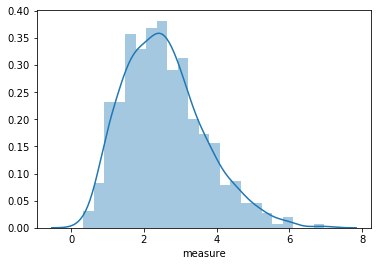

In [5]:
df = pd.DataFrame(np.random.gamma(5,.5,1000), columns=['measure'])

_ = sns.distplot(df.measure)

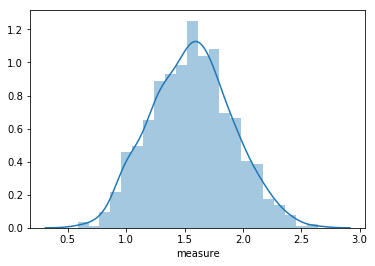

In [6]:
_ = sns.distplot(df.measure.apply(np.sqrt))

In [7]:
df['measure_zscore'] = (df.measure - df.measure.mean()) / df.measure.std()
keep_idx = np.abs(df.measure_zscore) < 3

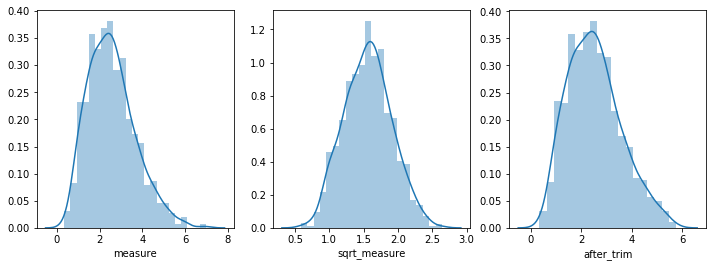

In [8]:
fig,ax = plt.subplots(1,3,figsize=(12,4))

_ = sns.distplot(df.measure,ax=ax[0])

_ = sns.distplot(df.measure.apply(np.sqrt),ax=ax[1])

_ = sns.distplot(df[keep_idx].measure,ax=ax[2])

_ = ax[0].set_xlabel('measure'); _ = ax[1].set_xlabel('sqrt_measure'); _ = ax[2].set_xlabel('after_trim')

#### Many more parametric and non-parametric methods

- Standardized Residuals
- DBScan
- ElipticEnvelope
- IsolationForest
- other Anomoly Detection techniques

### Dealing with outliers

- Drop observations

In [9]:
#Ex:

df = df[np.abs(df.measure-df.measure.mean()) < 3]

- Add dummies and replace
    - mean
    - infer from other features

In [10]:
#Ex:

df['measure_outlier'] = np.abs(df.measure - df.measure.mean()) > 3

df[df.measure_outlier] = df.measure.mean()

## Normalizing Features

In [11]:
df = pd.read_csv('../data/yellow_tripdata_2017-01_subset10000rows.csv')
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
df = df[(df.trip_duration < 3600) & (df.tip_amount > 0) & (df.tip_amount < 10)]
df[['trip_duration','tip_amount']].describe()

,trip_duration,tip_amount
count,6184.000000,6184.000000
mean,756.319858,2.388745
std,509.359485,1.581928
min,2.000000,0.010000
25%,396.000000,1.360000
50%,625.000000,2.000000
75%,987.000000,2.850000
max,3572.000000,9.990000


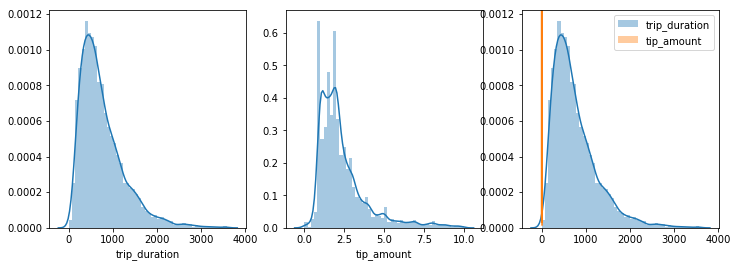

In [12]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
_ = sns.distplot(df.trip_duration, ax=ax[0])
_ = sns.distplot(df.tip_amount,ax=ax[1])
_ = sns.distplot(df.trip_duration, ax=ax[2])
_ = sns.distplot(df.tip_amount, ax=ax[2])
_ = plt.xlabel('')
_ = plt.legend(['trip_duration','tip_amount'])

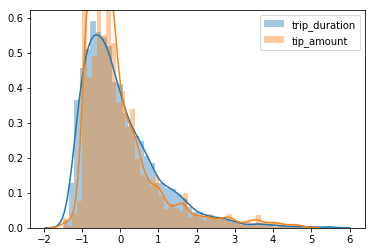

In [13]:
from scipy.stats import zscore

_ = sns.distplot(zscore(df.trip_duration))
_ = sns.distplot(zscore(df.tip_amount))
_ = plt.xlabel('')
_ = plt.legend(['trip_duration','tip_amount'])

### Binning

In [14]:
trip_duration_bins = [df.trip_duration.min(),
                      df.trip_duration.median(),
                      df.trip_duration.quantile(0.75),
                      df.trip_duration.max(),
                     ]
pd.cut(df.trip_duration, 
       bins=trip_duration_bins, 
       labels=['short','medium','long'])[:10]

1      short
3     medium
5      short
6       long
8     medium
9      short
10     short
12      long
13     short
14    medium
Name: trip_duration, dtype: category
Categories (3, object): [short < medium < long]

In [15]:
pd.get_dummies(
    pd.cut(df.trip_duration, 
           bins=trip_duration_bins, 
           labels=['short','medium','long'])[:10],
    prefix='trip_duration'
    )

,trip_duration_short,trip_duration_medium,trip_duration_long
1,1,0,0
3,0,1,0
5,1,0,0
6,0,0,1
8,0,1,0
9,1,0,0
10,1,0,0
12,0,0,1
13,1,0,0
14,0,1,0


### Data Manipulation Review

- Real
    - normalization (zscore)
    - binning (cut)
    - remove outliers
    

- Categorical
    - dummies (get_dummies)

- Both
    - remove duplicates (drop_duplicates)
    - fill missing values (fillna)
    - drop missing values (dropna)

## Managing Data

- Structured

- Unstructured

- Semi-structured

# Databases

- Flatfile
- Relational
- NoSQL

## Flatfile

- csv

## Relational / RDBMS / SQL

- sqlite
- Postgresql
- Mysql
- MariaDB
- Microsoft SQL Server
- Oracle

### Database Normalization

- reduce data redundancy
- improve data integrity

<img src='http://www.ecommerce-digest.com/images/normalization.jpg'>

### Basic SQL Commands

- SELECT

    <pre>
    SELECT * FROM trips;
    SELECT id, fare_amount FROM trips;</pre>

- WHERE

    <pre>
    SELECT * 
    FROM trips 
    WHERE vendor_id = 1 AND fare_amount > 10.0;</pre>

- LIMIT

    <pre>
    SELECT * 
    FROM trips 
    WHERE vendor_id = 1 AND fare_amount > 10.0
    LIMIT 10;</pre>

- DISTINCT

    <pre>
    SELECT DISTINCT vendor_id FROM trips</pre>

- COUNT

    <pre>
    SELECT COUNT(*) FROM trips</pre>

- ORDER BY

    <pre>
    SELECT fare_amount, passenger_count 
    FROM trips 
    ORDER BY fare_amount DESC;</pre>

- JOIN

    <pre>
    SELECT t.fare_amount, tzp.borough 
    FROM trips AS t
    LEFT JOIN taxi_zones AS tz ON tzp.locationid = t.pickup_location_id
    LIMIT 10</pre>

- Putting it all together

    <pre>
    SELECT 
        t.fare_amount
        ,t.trip_distance
        ,tzp.borough as pickup_borough
        ,tzd.borough as dropoff_borough
    FROM
        trips AS t
        LEFT JOIN taxi_zones AS tzp ON tzp.locationid = t.pickup_location_id
        LEFT JOIN taxi_zones AS tzd ON tzd.locationid = t.dropoff_location_id
    WHERE 
        t.fair_amount > 0 
        AND tzp.borough = 'Manhattan'
    ORDER BY
        t.trip_distance DESC
    LIMIT 10<\/pre>

## sqlalchemy

In [16]:
import sqlalchemy

db = sqlalchemy.create_engine('postgres:///nyc-taxi-data?host=/var/run/postgresql')

In [17]:
q = db.execute('SELECT * FROM trips LIMIT 2')

In [18]:
print(type(q))

<class 'sqlalchemy.engine.result.ResultProxy'>


In [19]:
for r in q:
    print(r)

(1, 1, '1', datetime.datetime(2016, 10, 1, 0, 0), datetime.datetime(2016, 10, 1, 0, 10, 45), 'N', 1, None, None, None, None, 3, Decimal('3.40'), Decimal('13'), Decimal('0.5'), Decimal('0.5'), Decimal('3.55'), Decimal('0'), None, Decimal('0.3'), Decimal('17.85'), '1', None, None, None, 80, 33, None, None)
(2, 1, '2', datetime.datetime(2016, 10, 1, 0, 0), datetime.datetime(2016, 10, 1, 0, 15, 51), 'N', 1, None, None, None, None, 5, Decimal('4.17'), Decimal('15'), Decimal('0.5'), Decimal('0.5'), Decimal('2'), Decimal('0'), None, Decimal('0.3'), Decimal('18.3'), '1', None, None, None, 262, 107, None, None)


In [20]:
sql = """
SELECT 
    t.id
    ,t.fare_amount
    ,t.trip_distance
    ,tzp.borough as pickup_borough
    ,tzd.borough as dropoff_borough
FROM
    trips AS t
    LEFT JOIN taxi_zones AS tzp ON tzp.locationid = t.pickup_location_id
    LEFT JOIN taxi_zones AS tzd ON tzd.locationid = t.dropoff_location_id
WHERE 
    t.fare_amount > 0 
    AND tzp.borough = 'Manhattan'
ORDER BY
    t.trip_distance DESC
LIMIT 10
"""

from datetime import datetime

st = datetime.now()
q = db.execute(sql)

for r in q:
    print(r)

print('\n{}'.format(datetime.now() - st))

(4874540, Decimal('26.5'), Decimal('10083318.00'), 'Manhattan', 'Brooklyn')
(5907762, Decimal('12'), Decimal('5063284.00'), 'Manhattan', 'Manhattan')
(7108727, Decimal('40'), Decimal('5000002.70'), 'Manhattan', 'Manhattan')
(5738861, Decimal('15'), Decimal('5000000.00'), 'Manhattan', 'Manhattan')
(10445134, Decimal('12'), Decimal('357000.70'), 'Manhattan', 'Manhattan')
(5433957, Decimal('9'), Decimal('300833.10'), 'Manhattan', 'Manhattan')
(5696636, Decimal('18'), Decimal('300833.10'), 'Manhattan', 'Manhattan')
(1448644, Decimal('19.5'), Decimal('300833.10'), 'Manhattan', 'Manhattan')
(5898916, Decimal('16'), Decimal('3008.30'), 'Manhattan', 'Manhattan')
(10154756, Decimal('10150.92'), Decimal('1524.20'), 'Manhattan', 'Manhattan')

0:00:27.278170


In [21]:
st = datetime.now()
df = pd.read_sql(sql,con=db, index_col='id')
print(df.info())
print('\n{}'.format(datetime.now() - st))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4874540 to 10154756
Data columns (total 4 columns):
fare_amount        10 non-null float64
trip_distance      10 non-null float64
pickup_borough     10 non-null object
dropoff_borough    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes
None

0:00:31.930641


## NoSQL

- key-value (Redis, Berkeley DB)
- document store (MongoDB, DocumentDB)
- wide column (Cassandra, HBase, DynamoDB
- graph (Neo4j, Giraph)

### Basic Mongo

- db

- collection

- find(filter,projection)

In [22]:
import pymongo

In [23]:
mdb = pymongo.MongoClient()

In [24]:
db = mdb.twitter_db

In [25]:
coll = db.twitter_collection

In [26]:
coll.find_one()

{'_id': ObjectId('59c95e2c2471847a9783c400'),
 'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Sep 25 19:51:08 +0000 2017',
 'entities': {'hashtags': [{'indices': [94, 106], 'text': 'DataScience'},
   {'indices': [107, 121], 'text': 'DataScientist'},
   {'indices': [122, 130], 'text': 'BigData'},
   {'indices': [131, 134], 'text': 'AI'},
   {'indices': [135, 139], 'text': 'IoT'}],
  'symbols': [],
  'urls': [{'display_url': 'futurism.com/videos/waste-m…',
    'expanded_url': 'https://futurism.com/videos/waste-management-just-got-cleaner-and-more-efficient/',
    'indices': [70, 93],
    'url': 'https://t.co/HtaXzfxbrA'}],
  'user_mentions': [{'id': 4361928854,
    'id_str': '4361928854',
    'indices': [3, 15],
    'name': 'Dan Yarmoluk',
    'screen_name': 'YarmolukDan'}]},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 912404120484511749,
 'id_str': '912404120484511749',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id

In [27]:
df = pd.DataFrame([coll.find_one()])

In [28]:
df

,_id,contributors,coordinates,created_at,entities,favorite_count,favorited,filter_level,geo,id,...,quote_count,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,59c95e2c2471847a9783c400,None,None,Mon Sep 25 19:51:08 +0000 2017,"{'hashtags': [{'text': 'DataScience', 'indices...",0,False,low,None,912404120484511749,...,0,0,0,False,{'created_at': 'Mon Sep 25 19:00:38 +0000 2017...,"<a href=""http://twitter.com/download/android"" ...",RT @YarmolukDan: Waste Management Just Got Cle...,1506369068629,False,"{'id': 912391257430794241, 'id_str': '91239125..."


In [29]:
hts = df.entities[0]['hashtags']
for ht in hts:
    print(ht['text'])

DataScience
DataScientist
BigData
AI
IoT


In [30]:
q = coll.find({'entities.hashtags.text':'AI'},{'user.screen_name':1,'entities':1})
for r in q:
    print(r['user']['screen_name'])
    print([x['text'] for x in r['entities']['hashtags']])

roxanewattenba6
['DataScience', 'DataScientist', 'BigData', 'AI', 'IoT']
sawney_patience
['DataScience', 'DataScientist', 'BigData', 'AI', 'IoT']
jackverr54
['MachineLearning', 'BigData', 'DataScience', 'AI', 'RStats', 'RLang', 'Statistics']
AvvRossello
['Chatbots', 'Infographic', 'AI', 'DeepLearning', 'Startup', 'IoT', 'BigData', 'Analytics', 'DataScience', 'Fintech']
Follow2bFollowd
['AI', 'MachineLearning', 'Fintech', 'insurtech', 'ML', 'DL', 'tech']
Follow2bFollowd
['AI', 'MachineLearning', 'BigData', 'Fintech', 'ML', 'Banking', 'tech']
Calcaware
['BigData', 'DataScience', 'MachineLearning', 'AI', 'DeepLearning', 'fintech']
